In [23]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/研究室/FY2023/2023.000a.情報理工学演習IV/2023/data


In [26]:
#day2

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))


[-2.72162779e+04  1.03422562e+05 -1.60690202e+05  1.31075767e+05
 -5.97811154e+04  1.49818040e+04 -1.89635695e+03  9.42855867e+01
  3.07045190e+00  1.45358675e-01]
[-2.72394516e+04  1.03513485e+05 -1.60838732e+05  1.31206878e+05
 -5.98489104e+04  1.50025716e+04 -1.89997596e+03  9.46079163e+01
  3.05877995e+00  1.45477156e-01]


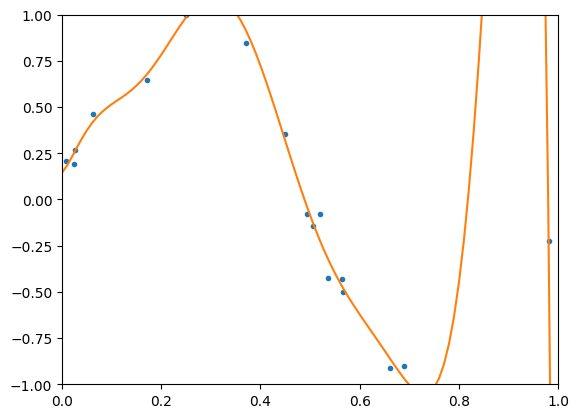

In [27]:
#use leastSquares
def leastSquares(X, Y, degree):
    Xs = []
    for i in range(degree+1):
        Xs.append(X**i)
    Xs = np.array(Xs).T
    Y = Y.T
    XT = Xs.transpose()
    W = np.dot(np.dot(np.linalg.inv(np.dot(XT,Xs)),XT),Y)
    return W[::-1]

x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))

print(leastSquares(x, y, 9))

#use polyfit
f = np.polyfit(x, y, 9)
p = np.poly1d(f)
print(f)
x_pred = np.arange(0.0, 1.0, 0.01)
y_pred = p(x_pred)

plt.axis([0,1,-1,1])
plt.plot(x, y, '.')
plt.plot(x_pred, y_pred)
plt.show()

Fitting Parameters: [-2.72432853e+04  1.03528368e+05 -1.60862739e+05  1.31227752e+05
 -5.98595107e+04  1.50057496e+04 -1.90051556e+03  9.46544020e+01
  3.05718634e+00  1.45491640e-01]


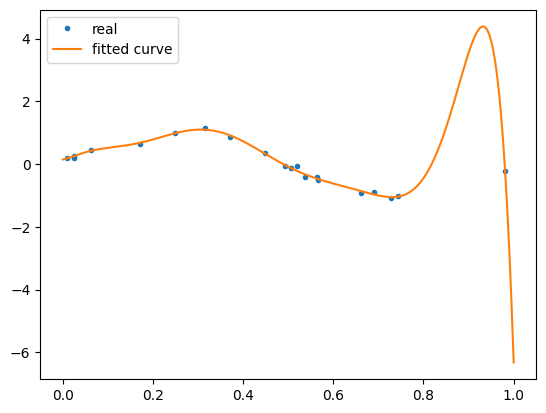

In [28]:
#use leastSq
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(M=0):

    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    plt.plot(x, y, '.', label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.legend()
    return p_lsq

x_points = np.linspace(0, 1, 1000)
p_lsq_0 = fitting(M=9)


In [29]:
#day3 7.11

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = p(x)
rmse_pred = rmse(y_pred, y)
print("rms error is: " + str(rmse_pred))

rms error is: 0.05325765202748416


In [30]:
#day3 7.12

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

f = np.polyfit(x_train, y_train, 3)
p = np.poly1d(f)

In [31]:
#day3 7.13

y_train_pred = p(x_train)
rmse_train = rmse(y_train_pred, y_train)
print("rms error is: " + str(rmse_train))

rms error is: 0.08828004249078789


In [32]:
#day3 7.14

y_test_pred = p(x_test)
rmse_test = rmse(y_test_pred, y_test)
print("rms error is: " + str(rmse_test))

rms error is: 0.1782636592111853


[0.4166515530991785, 0.41652396339404874, 0.08828004249078789, 0.08827710286968424, 0.05096428812075274, 0.044621662511348116, 0.04332263233563382, 0.006549970953149732, 5.5997707641471826e-11] [0.5657736069937611, 0.5677133830045522, 0.1782636592111853, 0.17800878155841013, 0.12998720761243113, 0.13441456703361213, 0.08932364047561182, 0.3977875699874044, 0.7907244958860967]
<class 'list'>


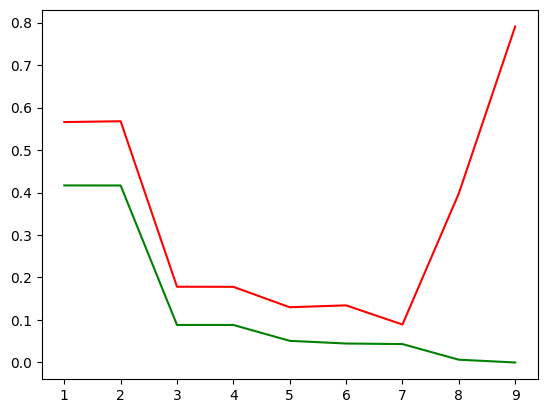

In [33]:
#day3 7.15

M = [1,2,3,4,5,6,7,8,9]
RMSE_train = []
RMSE_test = []

for num in M:
    f = np.polyfit(x_train, y_train, num)
    p = np.poly1d(f)
    y_train_pred = p(x_train)
    rmse_train = rmse(y_train_pred, y_train)
    RMSE_train.append(rmse_train)
    y_test_pred = p(x_test)
    rmse_test = rmse(y_test_pred, y_test)
    RMSE_test.append(rmse_test)

print (RMSE_train, RMSE_test)
print (type(RMSE_train))
plt.plot(M, RMSE_train, color='green', label='training error')
plt.plot(M, RMSE_test, color='red', label='testing error')

#day3 7.16 略